# **Resume Screening AI Project**

## importing Libraries

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading data

In [6]:
df = pd.read_csv("/content/UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


## Checking For Null Values

In [16]:
df.isnull().sum()

,0
Category,0
Resume,0
cleaned_resume,0


# Drop missing values

In [26]:
df.dropna(subset=['Resume', 'Category'], inplace=True)

# Preprocessing function

In [7]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Apply preprocessing

In [8]:
df['cleaned_resume'] = df['Resume'].apply(preprocess_text)

# Feature Extraction

In [9]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_resume'])
y = df['Category']

# Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Evaluation

In [12]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [20]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

Precision: 1.00


In [21]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.99


## Visualization


<ipython-input-25-b5c6676b37af>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, order=model.classes_,palette='viridis')


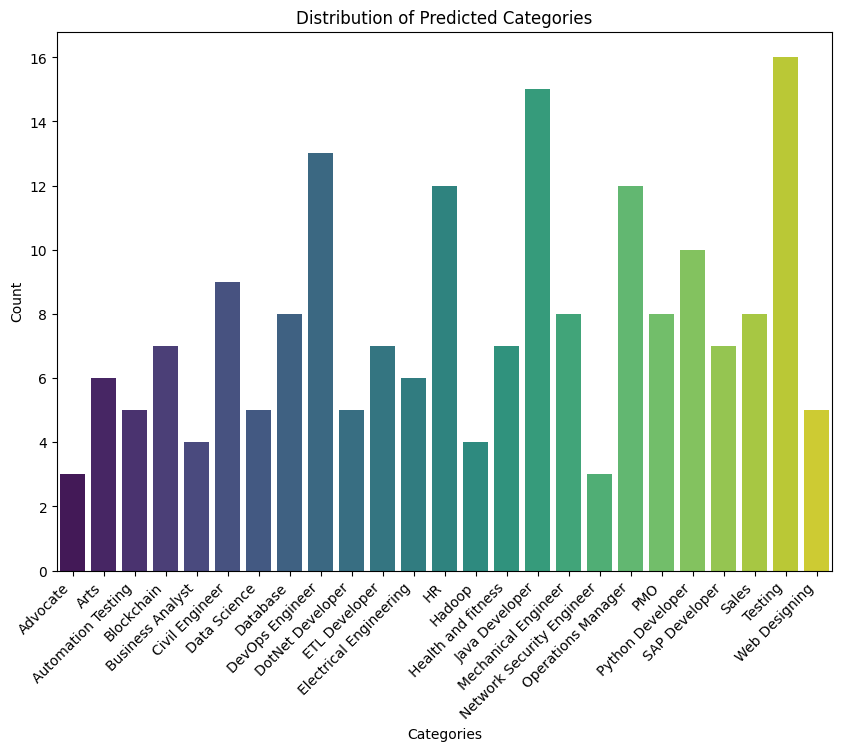

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.countplot(x=y_pred, order=model.classes_,palette='viridis')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Distribution of Predicted Categories')
plt.show()


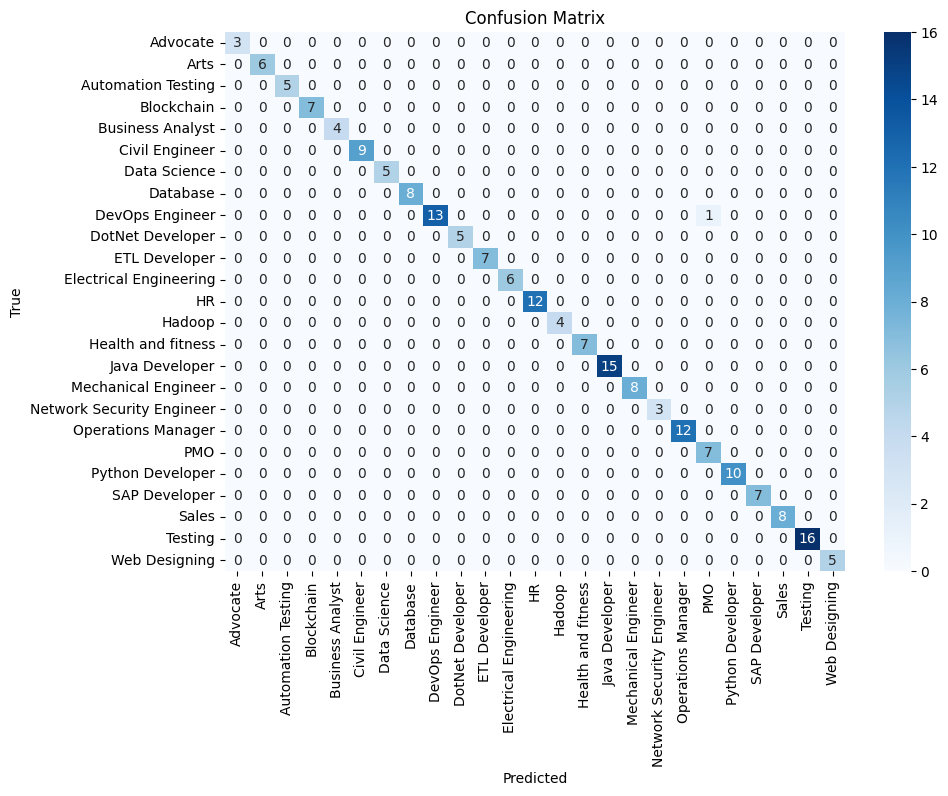

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)


plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()